In [2]:
from pymatgen.io.vasp import Xdatcar
from pymatgen.analysis.diffusion_analyzer import DiffusionAnalyzer
from vasppy.rdf import VanHoveAnalysis
import matplotlib.pyplot as plt
import numpy as np
import yaml

import sys
sys.path.insert(0, "../../scripts/")
from utils import flatten_list, get_structures, indices_by_species

from tqdm import tqdm_notebook

In [3]:
with open('../md_runs.yaml', 'r') as f:
    md_runs = yaml.load(f)
print(md_runs)

{'Li6PS5I': {'0p': [1, 2, 3, 4, 5], '50p': [1, 2, 3, 4, 5], '100p': [1, 2, 3, 4]}, 'Li6PS5Cl': {'0p': [1, 2, 3, 4], '50p': [1, 2, 3, 4], '100p': [1, 2, 3, 4]}}


In [4]:
def non_gaussian_parameter(dr):
    return (3.0 * np.mean(dr**4)) / (5.0 * np.mean(dr**2)**2) - 1.0

In [7]:
from collections import Counter

data_dir = '../../data/'

d_steps_list = np.unique(np.array(np.geomspace(1,500,20), dtype=int))
dr_data = {}
for system in md_runs:
    dr_data[system] = {}
    for disorder, runs in md_runs[system].items():
        print(f'{system} {disorder} inherent')
        dr_data[system][disorder] = {}
        for d_steps in tqdm_notebook(d_steps_list, leave=False):
            xdatcar_filenames = [ f'{data_dir}/{system}/{disorder}/run{i}/inherent_XDATCAR.gz' for i in runs ]
            xdatcars = ( Xdatcar( f ) for f in xdatcar_filenames )
            structures = flatten_list( [ x.structures for x in xdatcars ] )
            li_indices = indices_by_species( structures[0], 'Li' )
            lattice = structures[0].lattice

            self_dr = []
            for t, (struc_i, struc_j) in enumerate(zip( structures[:len(structures)-d_steps], 
                                                     structures[d_steps:]) ):
                i_frac_coords = struc_i.frac_coords[li_indices]
                j_frac_coords = struc_j.frac_coords[li_indices]
                dr_ij = lattice.get_all_distances(i_frac_coords, j_frac_coords)
                self_dr.extend(np.diag(dr_ij))
            dr_data[system][disorder][d_steps] = np.array(self_dr)
            


Li6PS5I 0p inherent


Li6PS5I 50p inherent


Li6PS5I 100p inherent


Li6PS5Cl 0p inherent


Li6PS5Cl 50p inherent


Li6PS5Cl 100p inherent


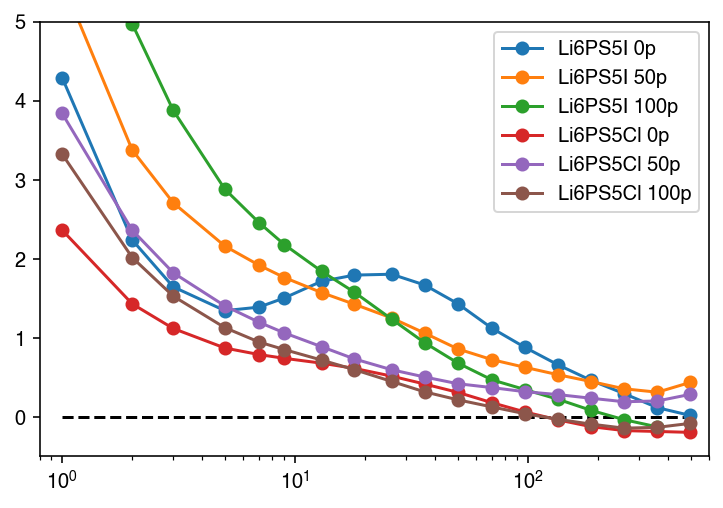

In [18]:
all_dt = d_steps_list
for system in ['Li6PS5I', 'Li6PS5Cl']:
    for disorder in ['0p', '50p', '100p']:
        alpha_2 = [ non_gaussian_parameter(np.array(dr_data[system][disorder][dt])) for dt in all_dt ]
        plt.semilogx(all_dt, alpha_2, 'o-', label=f'{system} {disorder}')
plt.legend()
plt.hlines(0,min(all_dt), max(all_dt), linestyles='--')
plt.xlim([0.8,600])
plt.ylim([-0.5,5])
plt.show()

In [19]:
from collections import Counter

data_dir = '../../data/'

d_steps_list = np.unique(np.array(np.geomspace(1,500,20), dtype=int))
dr_data = {}
for system in md_runs:
    dr_data[system] = {}
    for disorder, runs in md_runs[system].items():
        print(f'{system} {disorder} inherent')
        dr_data[system][disorder] = {}
        for d_steps in tqdm_notebook(d_steps_list, leave=False):
            xdatcar_filenames = [ f'{data_dir}/{system}/{disorder}/run{i}/actual_XDATCAR.gz' for i in runs ]
            xdatcars = ( Xdatcar( f ) for f in xdatcar_filenames )
            structures = flatten_list( [ x.structures for x in xdatcars ] )
            li_indices = indices_by_species( structures[0], 'Li' )
            lattice = structures[0].lattice

            self_dr = []
            for t, (struc_i, struc_j) in enumerate(zip( structures[:len(structures)-d_steps], 
                                                     structures[d_steps:]) ):
                i_frac_coords = struc_i.frac_coords[li_indices]
                j_frac_coords = struc_j.frac_coords[li_indices]
                dr_ij = lattice.get_all_distances(i_frac_coords, j_frac_coords)
                self_dr.extend(np.diag(dr_ij))
            dr_data[system][disorder][d_steps] = np.array(self_dr)
            



Li6PS5I 0p inherent


Li6PS5I 50p inherent


Li6PS5I 100p inherent


Li6PS5Cl 0p inherent


Li6PS5Cl 50p inherent


Li6PS5Cl 100p inherent


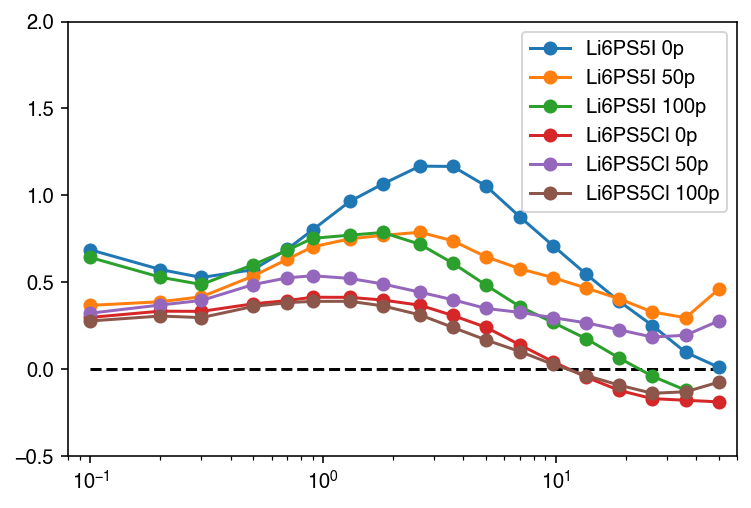

In [32]:
all_dt = d_steps_list
for system in ['Li6PS5I', 'Li6PS5Cl']:
    for disorder in ['0p', '50p', '100p']:
        alpha_2 = [ non_gaussian_parameter(np.array(dr_data[system][disorder][dt])) for dt in all_dt ]
        plt.semilogx(np.array(all_dt)/10, alpha_2, 'o-', label=f'{system} {disorder}')
plt.legend()
plt.hlines(0,min(all_dt)/10, max(all_dt)/10, linestyles='--')
plt.xlim([0.08,60])
plt.ylim([-0.5,2])
plt.show()

In [35]:
alpha_2 = [ non_gaussian_parameter(np.array(dr_data['Li6PS5I']['0p'][dt])) for dt in all_dt ]

In [36]:
np.argmax(alpha_2)

8

In [39]:
all_dt[8]/10

2.6

In [40]:
all_dt[-1]/10

49.9